In [41]:

import ast
import sys
import math
import numpy as np #v 1.23.3
import networkx as nx
import matplotlib.cm as cm
import matplotlib
import argparse
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from networkx.algorithms import community
import community
from community import community_louvain #conda install python-louvain
from PIL import Image
import os
#os.chdir('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS')

import scipy
from numpy import roots
import random
import pickle
import re
from scipy.stats import pearsonr
import seaborn as sns


In [83]:
#os.getcwd()
USR='LUKE'
if USR=='LUKE':
    ALL_ANALYSIS='ALL_GAUDI.csv'#finalfilename
    #directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/03-05-23_4"
    directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2"
    clean_Gs=directory+'/GRAPHS/CLEANED'
    dir_G=clean_Gs+"/BASE"
    dir_G_widths=clean_Gs+'/WIDTH'
    dir_G_widths_o=clean_Gs+'/WIDTH_O'
    pickle_f=directory+"/_keyed_nodes.pickle"
    #directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/03-05-23_4"
    directory="/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/CURRENT_Gs/01-05-23_2"
    clean_Gs=directory+'/GRAPHS/CLEANED'
    dir_G=clean_Gs+"/BASE"
    dir_G_widths=clean_Gs+'/WIDTH'
    dir_G_widths_o=clean_Gs+'/WIDTH_O'
    pickle_f=directory+"/_keyed_nodes.pickle"

    os.chdir(directory)
    TREATS=pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/COLONY_INFO.csv')
    
    os.chdir(directory)
    #os.chdir("/media/ll16598/One Touch/CT_ANALYSIS/")
    #VOXEL_SIZES = pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ANALYSIS/VOXEL_SIZES.csv')

elif USR=='SUPER':
    clean_Gs="/home/cf19810/Documents/LUKE/GRAPHS/CLEANED"
    dir_G=clean_Gs+"/BASE"
    dir_G_widths=clean_Gs+'/WIDTH'
    dir_G_widths_o=clean_Gs+'/WIDTH_O'
if USR=='CLUSTER':
    directory="/user/work/ll16598"
    dir_G=directory+"/BASE"
    dir_G_widths_o=directory+'/WIDTH_O'
    TREATS = pd.read_csv(directory+'/COLONY_INFO.csv')
#     os.chdir("/media/cf19810/One Touch/CT_ANALYSIS")
#     VOXEL_SIZES = pd.read_csv('/home/cf19810/Documents/LUKE/VOXEL_SIZES.csv')

In [84]:
dir_csv='/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_DATA/RAND_CHAM_DATA/ABM_RESULTS_RAND_CHAM'

files = [ f.path for f in os.scandir(dir_csv)]
l=0
dfs=[]
list_names=[]
subset_list=[1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10,1,1,2,2,3,3,4,4,5,5,6,6,7,7,8,8,9,9,10,10]
for file in range(0,len(files)):
    nodes1_filename = os.path.basename(files[file])
    filename_without_extension = nodes1_filename.split('.csv')[0]
    if 'FULL' in filename_without_extension:
        continue
    s_df=pd.read_csv(files[file])
    dfs.append(s_df)
result_df = pd.concat(dfs, ignore_index=True)


In [85]:
base_df=pd.read_csv('/home/ll16598/Documents/ARCHITECTURAL_IMMUNITY/ABM_DATA/BASE_1310.csv')



In [86]:
base_df

,dt,condition,name,day,spores_nurse,spores_forager,spores_nurse_sum,spores_forager_sum,iterations,nurse_ks,forag_ks,nurse_ne_ks,forag_ne_ks,density_exps,list_forager_prev,list_nurse_prev,list_nurse_cham,list_forage_en,list_inoculated_cham
0,0,SHAM,R1C1SK_WED,WED,0.000000,0.000000,0.000000,0.000000,20230917094301,10.0,-10.0,-10.0,10.0,1.0,0.0,0.0,0.000000,0.029412,0.00
1,100,SHAM,R1C1SK_WED,WED,0.000000,0.000000,0.000000,0.000000,20230917094301,10.0,-10.0,-10.0,10.0,1.0,0.0,0.0,0.014706,0.021739,0.00
2,200,SHAM,R1C1SK_WED,WED,0.000000,0.000000,0.000000,0.000000,20230917094301,10.0,-10.0,-10.0,10.0,1.0,0.0,0.0,0.074074,0.010526,0.00
3,300,SHAM,R1C1SK_WED,WED,0.000000,0.000000,0.000000,0.000000,20230917094301,10.0,-10.0,-10.0,10.0,1.0,0.0,0.0,0.013158,0.015625,0.00
4,400,SHAM,R1C1SK_WED,WED,0.000000,0.000000,0.000000,0.000000,20230917094301,10.0,-10.0,-10.0,10.0,1.0,0.0,0.0,0.038462,0.010204,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2591995,64300,SHAM,R10C2SL_MON,MON,0.090239,0.099608,12.272506,19.921617,20230920151145,10.0,-10.0,-10.0,10.0,1.0,1.0,1.0,0.279412,0.425000,0.80
2591996,64400,SHAM,R10C2SL_MON,MON,0.090131,0.099663,12.077617,20.530635,20230920151145,10.0,-10.0,-10.0,10.0,1.0,1.0,1.0,0.261194,0.451456,0.75
2591997,64500,SHAM,R10C2SL_MON,MON,0.090441,0.099702,11.938269,20.737947,20230920151145,10.0,-10.0,-10.0,10.0,1.0,1.0,1.0,0.257576,0.456731,0.75
2591998,64600,SHAM,R10C2SL_MON,MON,0.090427,0.099700,11.574714,21.335743,20230920151145,10.0,-10.0,-10.0,10.0,1.0,1.0,1.0,0.242188,0.453271,0.75


In [87]:
sum_values = base_df.groupby(['name', 'iterations'])[['spores_nurse', 'spores_forager']].sum()
# Resetting the index for better formatting
sum_values_reset = sum_values.reset_index()



In [88]:
nurse_minus=[]
forage_minus=[]
for i in range(0,len(result_df)):
    for ii in range(0, len(sum_values_reset)):
        if result_df['name'][i]==sum_values_reset['name'][ii]:
            break
    nurse_minus.append(result_df['sum_nurse'][i]-sum_values_reset['spores_nurse'][ii])
    forage_minus.append(result_df['sum_forage'][i]-sum_values_reset['spores_forager'][ii])

result_df['nurse_minus_sum']=nurse_minus
result_df['forage_minus_sum']=forage_minus

In [89]:
max_t=max(base_df['dt'])
base_df=base_df[base_df['dt']==max_t]

In [90]:
mean_values = base_df.groupby('name')[['spores_nurse', 'spores_forager']].mean()

# Resetting the index for better formatting
mean_values_reset = mean_values.reset_index()



In [91]:
nurse_minus=[]
forage_minus=[]
for i in range(0,len(result_df)):
    for ii in range(0, len(mean_values_reset)):
        if result_df['name'][i]==mean_values_reset['name'][ii]:
            break
    nurse_minus.append(result_df['final_nurse'][i]-mean_values_reset['spores_nurse'][ii])
    forage_minus.append(result_df['final_forage'][i]-mean_values_reset['spores_forager'][ii])

result_df['nurse_minus']=nurse_minus
result_df['forage_minus']=forage_minus

In [93]:
result_df['close_minus']=result_df['mean_closeness_centrality_new']-result_df['mean_closeness_centrality']
result_df['path_minus']=result_df['mean_path_new']-result_df['mean_path']
result_df['flow_minus']=result_df['mean_flow_centrality_new']-result_df['mean_flow_centrality']
result_df['cham_minus']=result_df['chamber_connection_proportion_mean_new']-result_df['chamber_connection_proportion_mean']


In [94]:
wed_df = result_df[result_df['name'].str.contains('WED', na=False)]
mon_df = result_df[result_df['name'].str.contains('MON', na=False)]

In [95]:
ticksize=12
labsize=14
titlesize=20

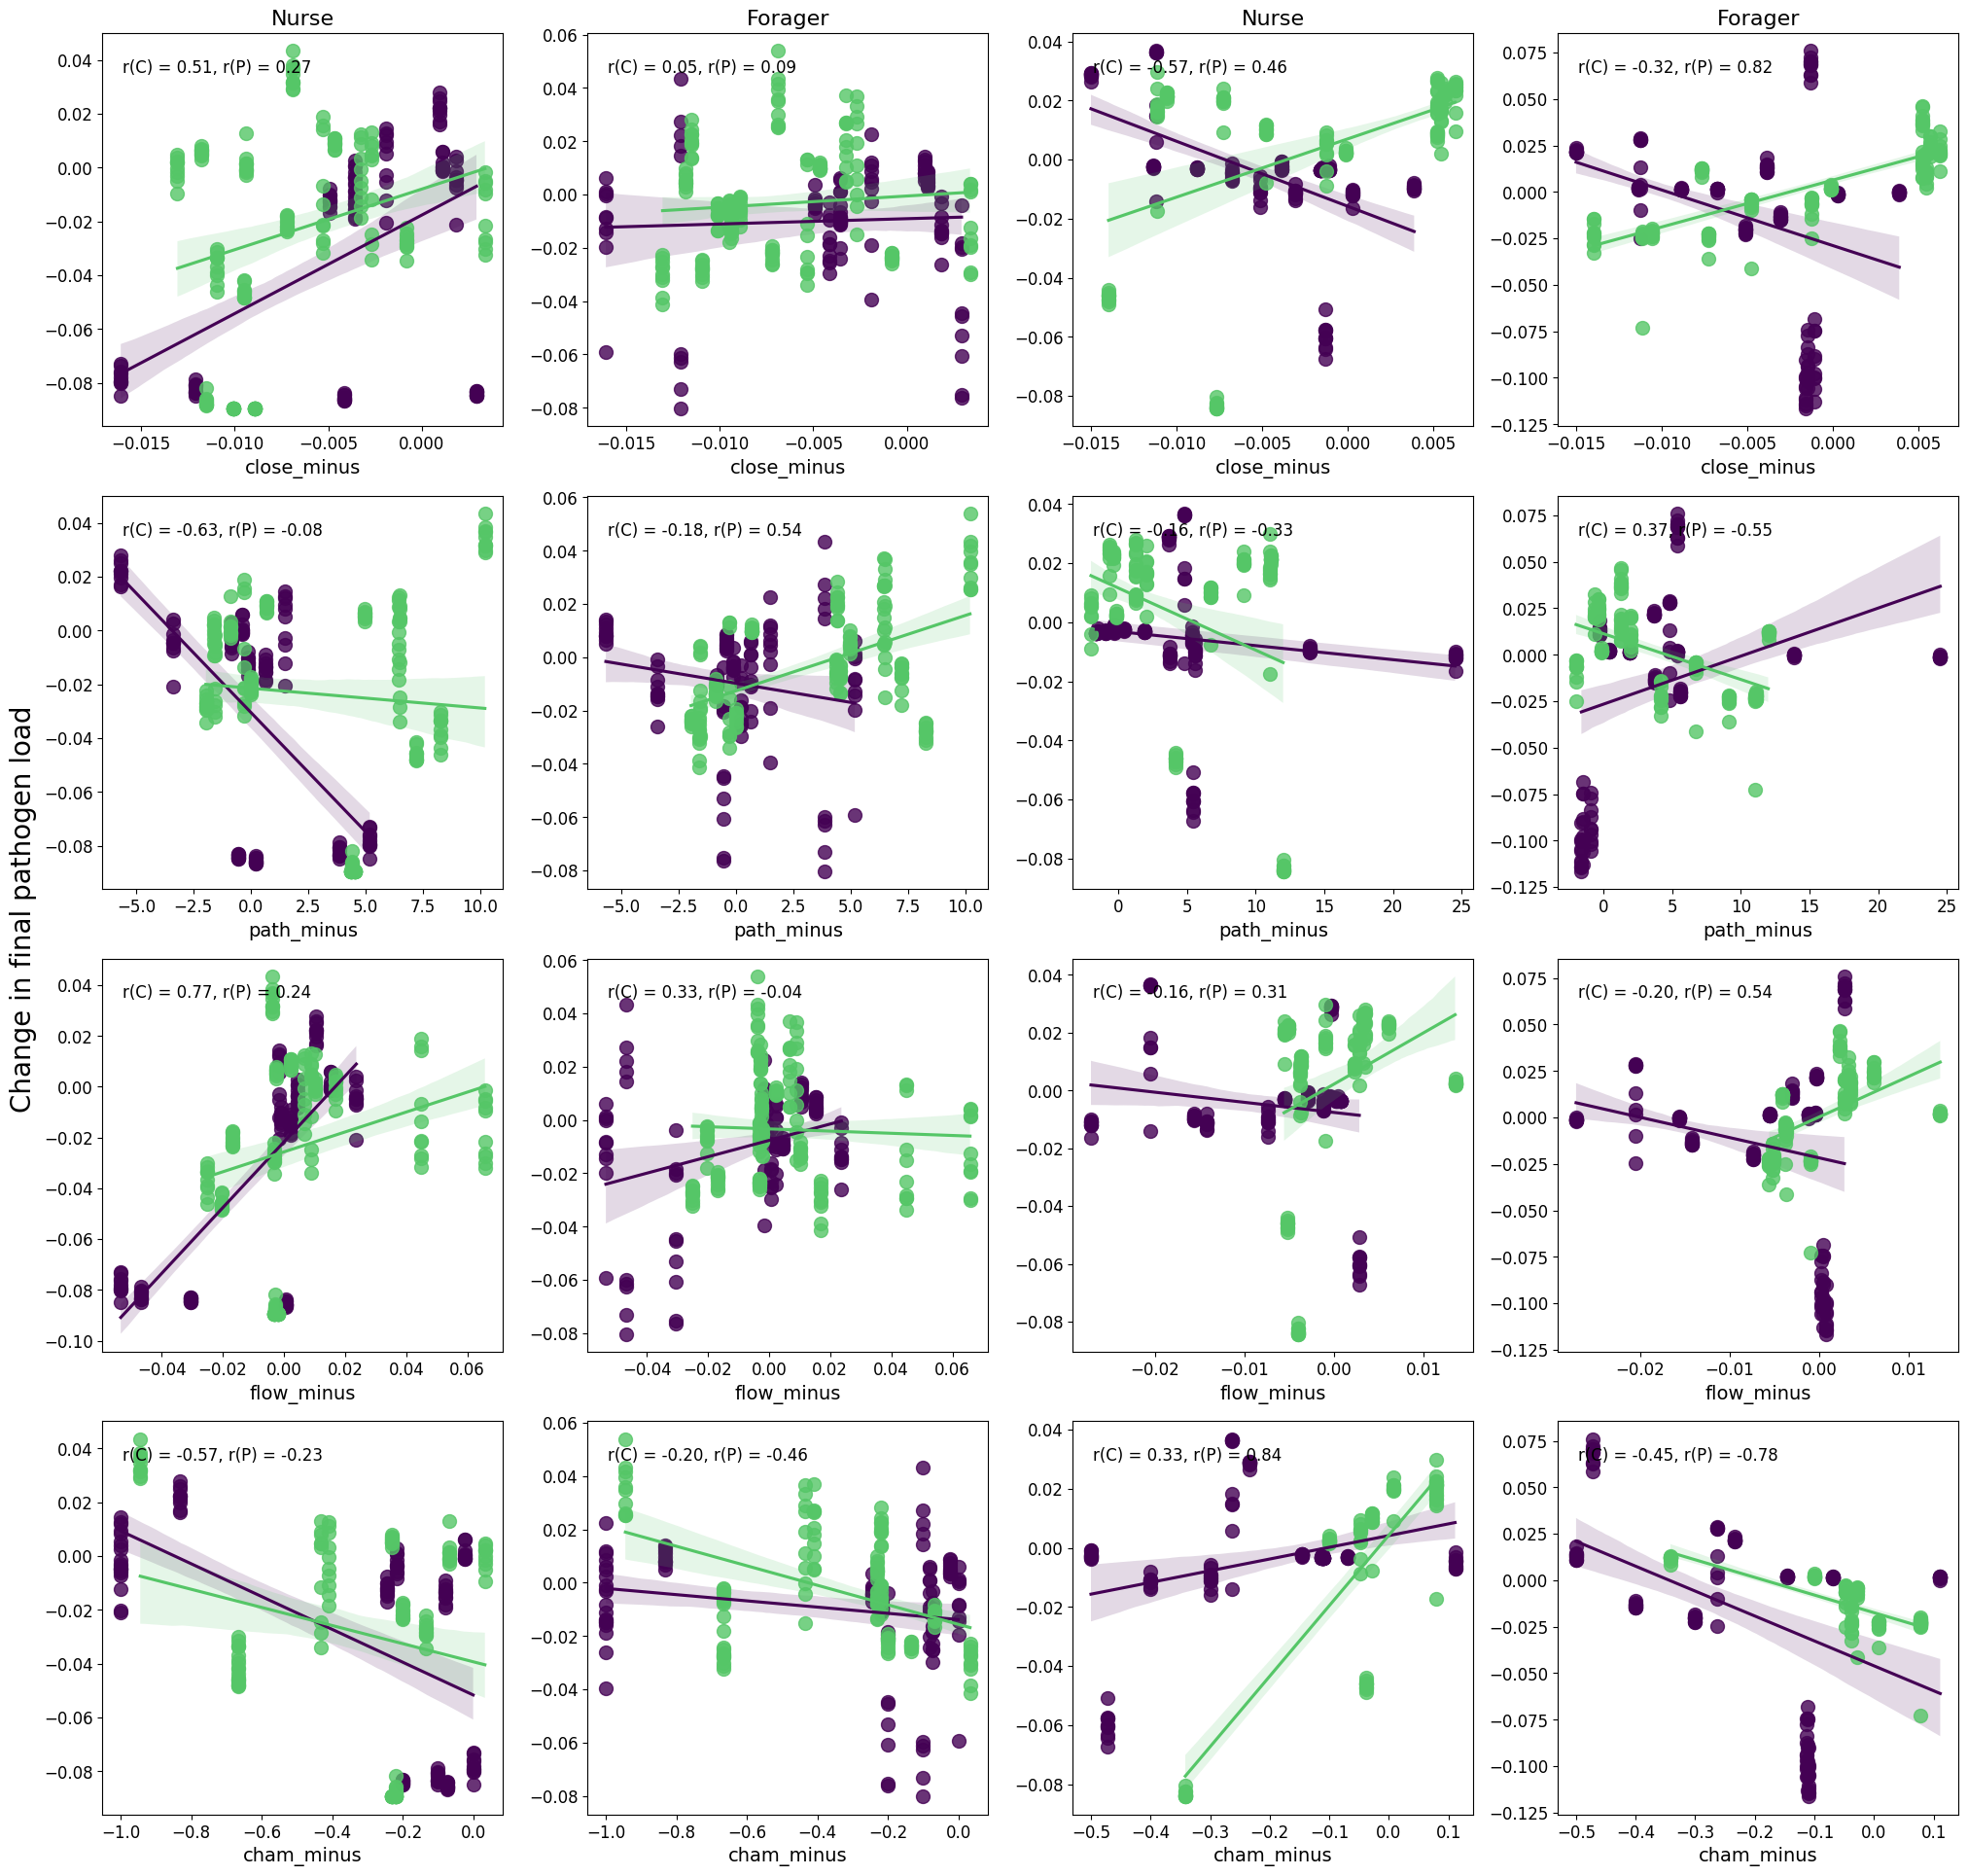

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming wed_df and mon_df are your DataFrames and other necessary imports have been made
# ...

# List of columns to plot
columns_to_plot = ['close_minus', 'path_minus', 'flow_minus', 'cham_minus']

# Create a 4x4 plotting grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(columns_to_plot):
    for j, data_to_plot in enumerate([wed_df, mon_df]):
        # Drop rows with NaN values in the current column, nurse_minus, forage_minus, and condition
        cleaned_df = data_to_plot[['nurse_minus', 'forage_minus', column, 'condition']].dropna()

        # Split data by condition
        sham_df = cleaned_df[cleaned_df['condition'] == 'SHAM']
        pathogen_df = cleaned_df[cleaned_df['condition'] == 'PATHOGEN']

        # Plot correlation with nurse_minus
        sns.regplot(data=sham_df, x=column, y='nurse_minus', color="#440154FF", ax=axs[i, j*2], label='_nolegend_', scatter_kws={'s': 100})
        sns.regplot(data=pathogen_df, x=column, y='nurse_minus', color="#55C667FF", ax=axs[i, j*2], label='_nolegend_', scatter_kws={'s': 100})
        r_nurse_sham = pearsonr(sham_df['nurse_minus'], sham_df[column])[0]
        r_nurse_pathogen = pearsonr(pathogen_df['nurse_minus'], pathogen_df[column])[0]
        axs[i, j*2].text(0.05, 0.9, f'r(C) = {r_nurse_sham:.2f}, r(P) = {r_nurse_pathogen:.2f}', transform=axs[i, j*2].transAxes, fontsize=12)

        # Plot correlation with forage_minus
        sns.regplot(data=sham_df, x=column, y='forage_minus', color="#440154FF", ax=axs[i, j*2 + 1], label='_nolegend_', scatter_kws={'s': 100})
        sns.regplot(data=pathogen_df, x=column, y='forage_minus', color="#55C667FF", ax=axs[i, j*2 + 1], label='_nolegend_', scatter_kws={'s': 100})
        r_forage_sham = pearsonr(sham_df['forage_minus'], sham_df[column])[0]
        r_forage_pathogen = pearsonr(pathogen_df['forage_minus'], pathogen_df[column])[0]
        axs[i, j*2 + 1].text(0.05, 0.9, f'r(C) = {r_forage_sham:.2f}, r(P) = {r_forage_pathogen:.2f}', transform=axs[i, j*2 + 1].transAxes, fontsize=12)

        # Set font sizes for axis labels and ticks
        axs[i, j*2].tick_params(labelsize=12)
        axs[i, j*2 + 1].tick_params(labelsize=12)
        axs[i, j*2].set_xlabel(column, fontsize=14)
        axs[i, j*2 + 1].set_xlabel(column, fontsize=14)
        axs[i, j*2].set_ylabel('')  # Remove y-axis label
        axs[i, j*2 + 1].set_ylabel('')  # Remove y-axis label

# Set column titles with custom font size
axs[0, 0].set_title('Nurse', fontsize=16)
axs[0, 1].set_title('Forager', fontsize=16)
axs[0, 2].set_title('Nurse', fontsize=16)
axs[0, 3].set_title('Forager', fontsize=16)

# Set grand y-axis label
fig.text(-0.01, 0.5, 'Change in final pathogen load', va='center', rotation='vertical', fontsize=titlesize)
# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for suptitle
plt.show()


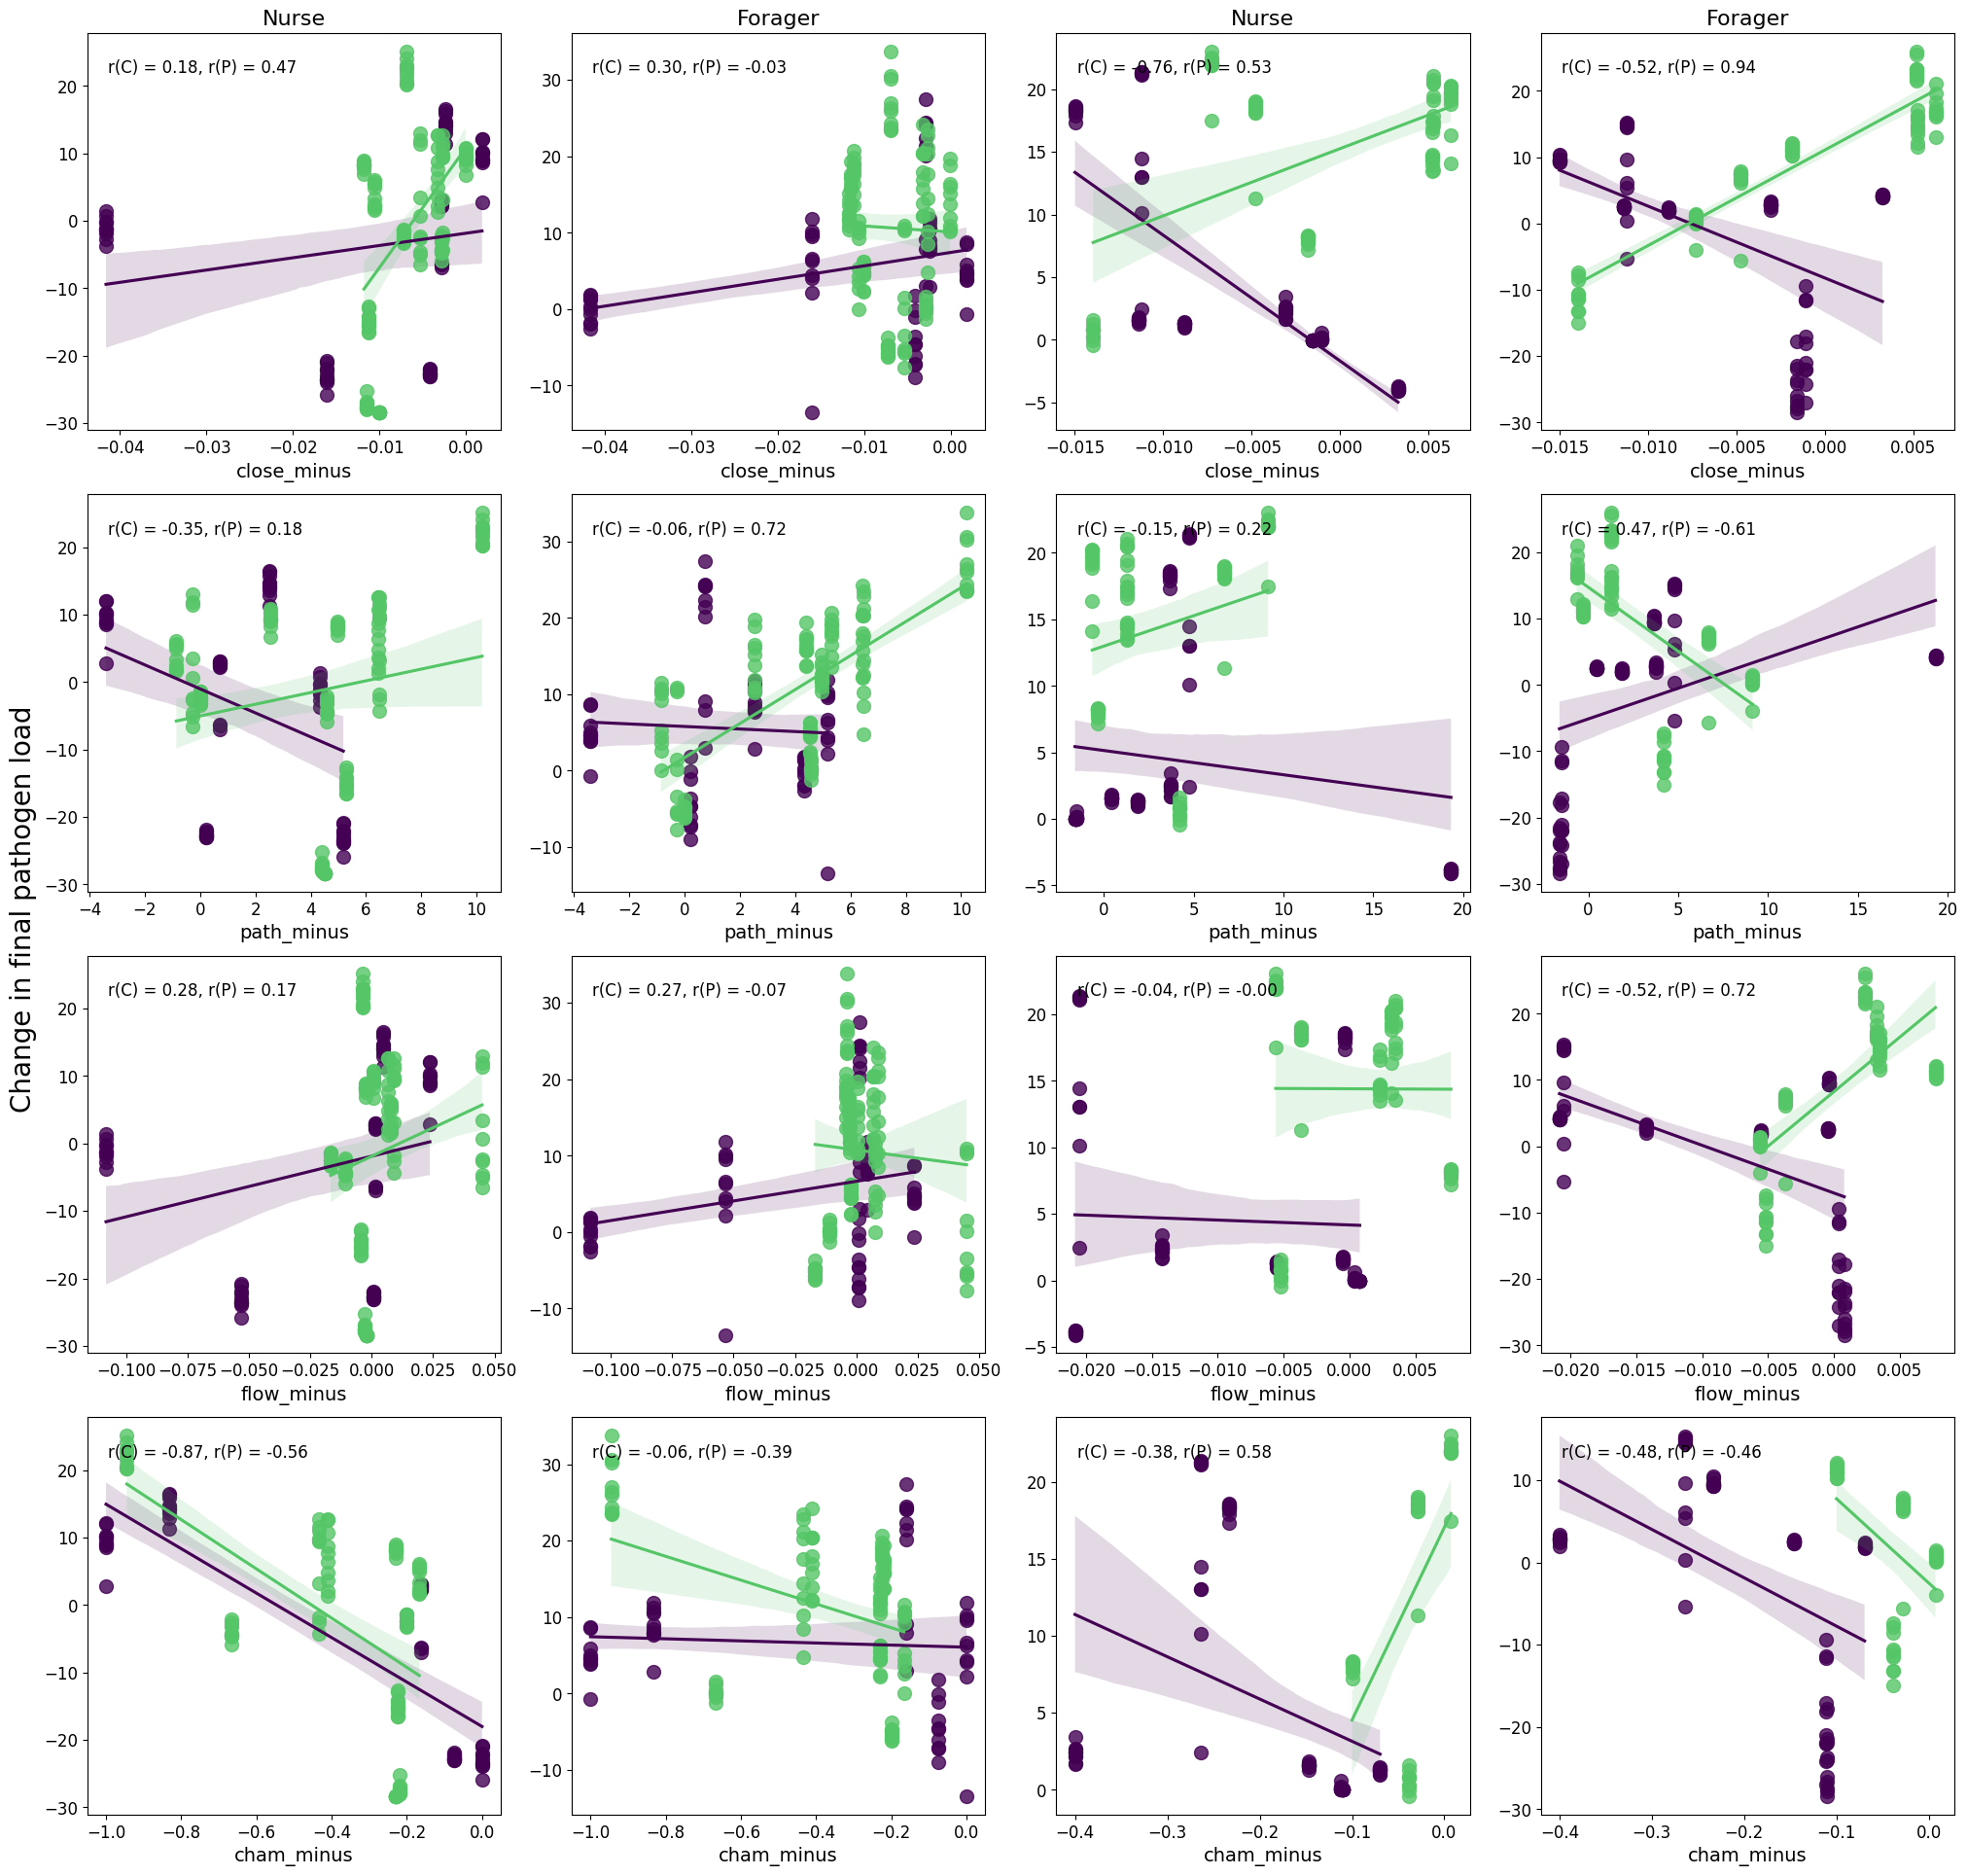

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming wed_df and mon_df are your DataFrames and other necessary imports have been made
# ...

# List of columns to plot
columns_to_plot = ['close_minus', 'path_minus', 'flow_minus', 'cham_minus']

# Create a 4x4 plotting grid
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(columns_to_plot):
    for j, data_to_plot in enumerate([wed_df, mon_df]):
        # Drop rows with NaN values in the current column, nurse_minus, forage_minus, and condition
        cleaned_df = data_to_plot[['nurse_minus_sum', 'forage_minus_sum', column, 'condition']].dropna()

        # Split data by condition
        sham_df = cleaned_df[cleaned_df['condition'] == 'SHAM']
        pathogen_df = cleaned_df[cleaned_df['condition'] == 'PATHOGEN']

        # Plot correlation with nurse_minus
        sns.regplot(data=sham_df, x=column, y='nurse_minus_sum', color="#440154FF", ax=axs[i, j*2], label='_nolegend_', scatter_kws={'s': 100})
        sns.regplot(data=pathogen_df, x=column, y='nurse_minus_sum', color="#55C667FF", ax=axs[i, j*2], label='_nolegend_', scatter_kws={'s': 100})
        r_nurse_sham = pearsonr(sham_df['nurse_minus_sum'], sham_df[column])[0]
        r_nurse_pathogen = pearsonr(pathogen_df['nurse_minus_sum'], pathogen_df[column])[0]
        axs[i, j*2].text(0.05, 0.9, f'r(C) = {r_nurse_sham:.2f}, r(P) = {r_nurse_pathogen:.2f}', transform=axs[i, j*2].transAxes, fontsize=12)

        # Plot correlation with forage_minus
        sns.regplot(data=sham_df, x=column, y='forage_minus_sum', color="#440154FF", ax=axs[i, j*2 + 1], label='_nolegend_', scatter_kws={'s': 100})
        sns.regplot(data=pathogen_df, x=column, y='forage_minus_sum', color="#55C667FF", ax=axs[i, j*2 + 1], label='_nolegend_', scatter_kws={'s': 100})
        r_forage_sham = pearsonr(sham_df['forage_minus_sum'], sham_df[column])[0]
        r_forage_pathogen = pearsonr(pathogen_df['forage_minus_sum'], pathogen_df[column])[0]
        axs[i, j*2 + 1].text(0.05, 0.9, f'r(C) = {r_forage_sham:.2f}, r(P) = {r_forage_pathogen:.2f}', transform=axs[i, j*2 + 1].transAxes, fontsize=12)

        # Set font sizes for axis labels and ticks
        axs[i, j*2].tick_params(labelsize=12)
        axs[i, j*2 + 1].tick_params(labelsize=12)
        axs[i, j*2].set_xlabel(column, fontsize=14)
        axs[i, j*2 + 1].set_xlabel(column, fontsize=14)
        axs[i, j*2].set_ylabel('')  # Remove y-axis label
        axs[i, j*2 + 1].set_ylabel('')  # Remove y-axis label

# Set column titles with custom font size
axs[0, 0].set_title('Nurse', fontsize=16)
axs[0, 1].set_title('Forager', fontsize=16)
axs[0, 2].set_title('Nurse', fontsize=16)
axs[0, 3].set_title('Forager', fontsize=16)

# Set grand y-axis label
fig.text(-0.01, 0.5, 'Change in sum pathogen load', va='center', rotation='vertical', fontsize=titlesize)
# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust top to make room for suptitle
plt.show()


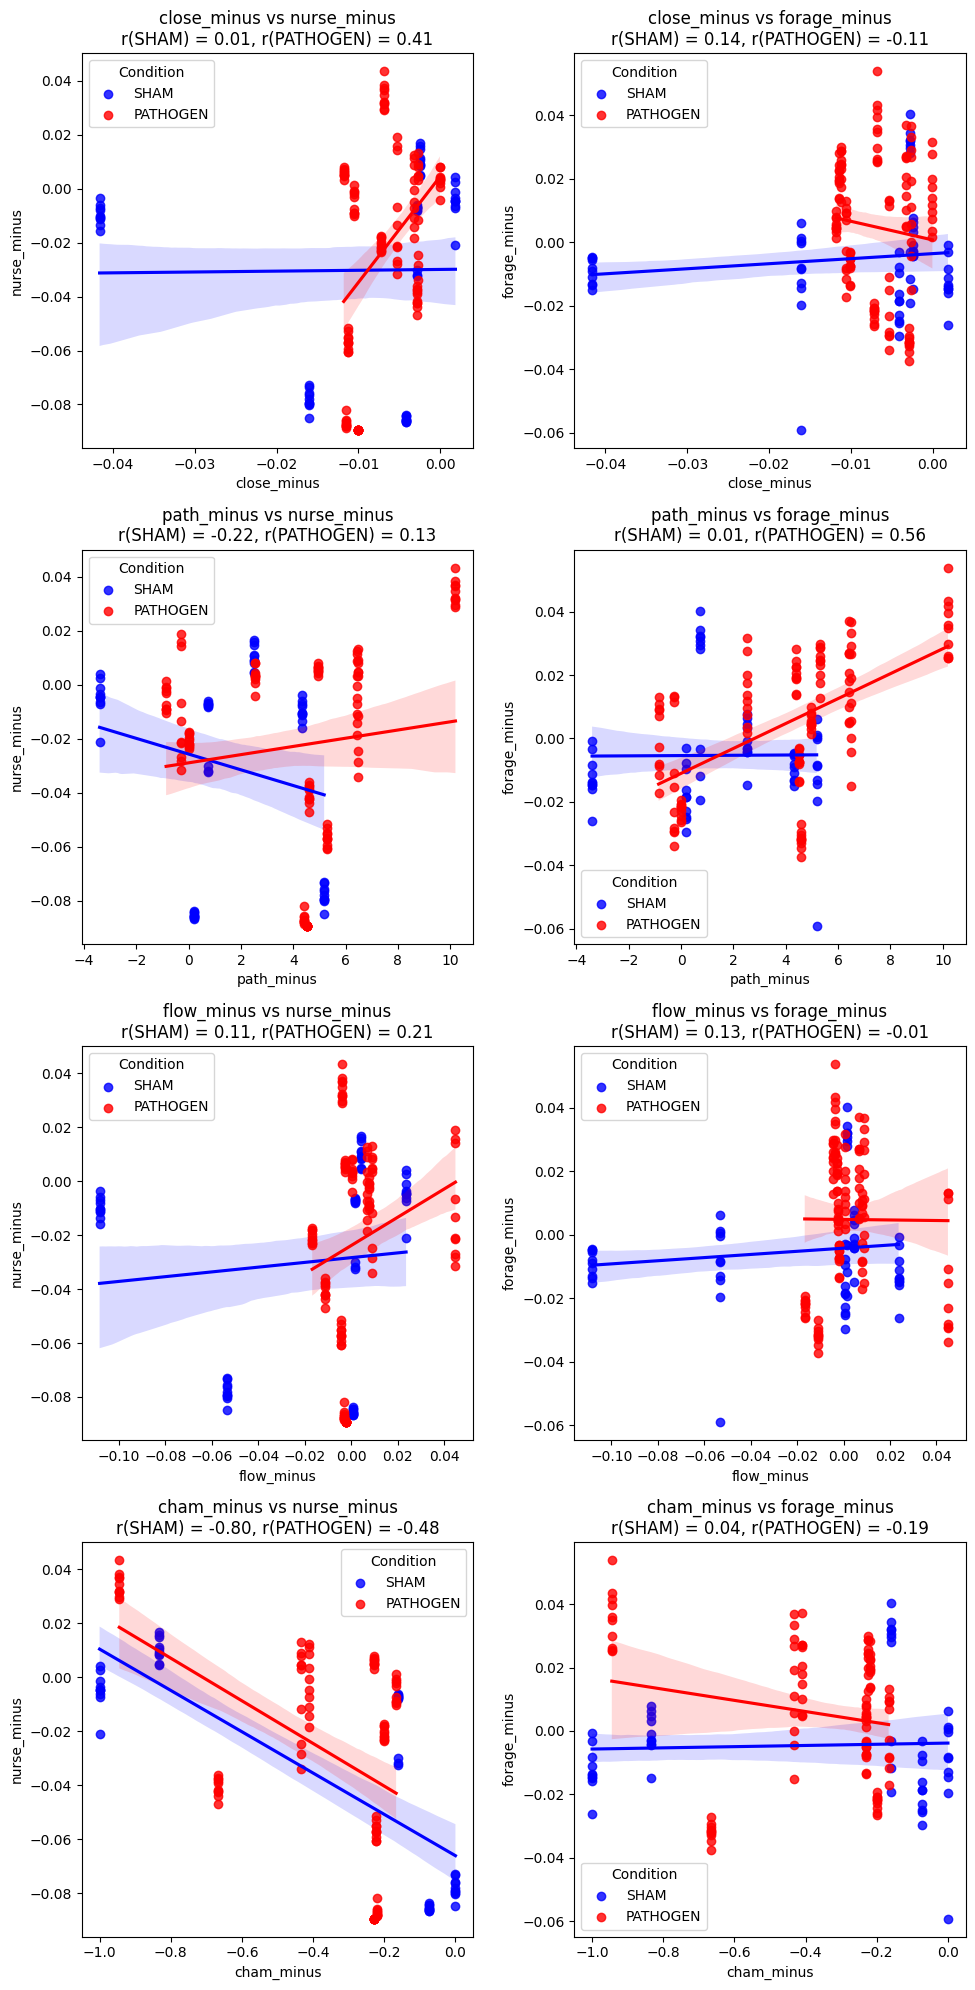

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming result_df is your DataFrame and other necessary imports have been made
# ...

# List of columns to plot
columns_to_plot = ['close_minus', 'path_minus', 'flow_minus', 'cham_minus']

# Create a 4x2 plotting grid
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for i, column in enumerate(columns_to_plot):
    # Drop rows with NaN values in the current column, nurse_minus, forage_minus, and condition
    cleaned_df = data_to_plot[['nurse_minus', 'forage_minus', column, 'condition']].dropna()
    
    # Split data by condition
    sham_df = cleaned_df[cleaned_df['condition'] == 'SHAM']
    pathogen_df = cleaned_df[cleaned_df['condition'] == 'PATHOGEN']
    
    # Plot correlation with nurse_minus
    sns.regplot(data=sham_df, x=column, y='nurse_minus', color='blue', ax=axs[i, 0], label='SHAM')
    sns.regplot(data=pathogen_df, x=column, y='nurse_minus', color='red', ax=axs[i, 0], label='PATHOGEN')
    axs[i, 0].legend(title='Condition')
    r_nurse_sham = pearsonr(sham_df['nurse_minus'], sham_df[column])[0]
    r_nurse_pathogen = pearsonr(pathogen_df['nurse_minus'], pathogen_df[column])[0]
    axs[i, 0].set_title(f'{column} vs nurse_minus\nr(SHAM) = {r_nurse_sham:.2f}, r(PATHOGEN) = {r_nurse_pathogen:.2f}')
    
    # Plot correlation with forage_minus
    sns.regplot(data=sham_df, x=column, y='forage_minus', color='blue', ax=axs[i, 1], label='SHAM')
    sns.regplot(data=pathogen_df, x=column, y='forage_minus', color='red', ax=axs[i, 1], label='PATHOGEN')
    axs[i, 1].legend(title='Condition')
    r_forage_sham = pearsonr(sham_df['forage_minus'], sham_df[column])[0]
    r_forage_pathogen = pearsonr(pathogen_df['forage_minus'], pathogen_df[column])[0]
    axs[i, 1].set_title(f'{column} vs forage_minus\nr(SHAM) = {r_forage_sham:.2f}, r(PATHOGEN) = {r_forage_pathogen:.2f}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [51]:
data_to_plot=mon_df

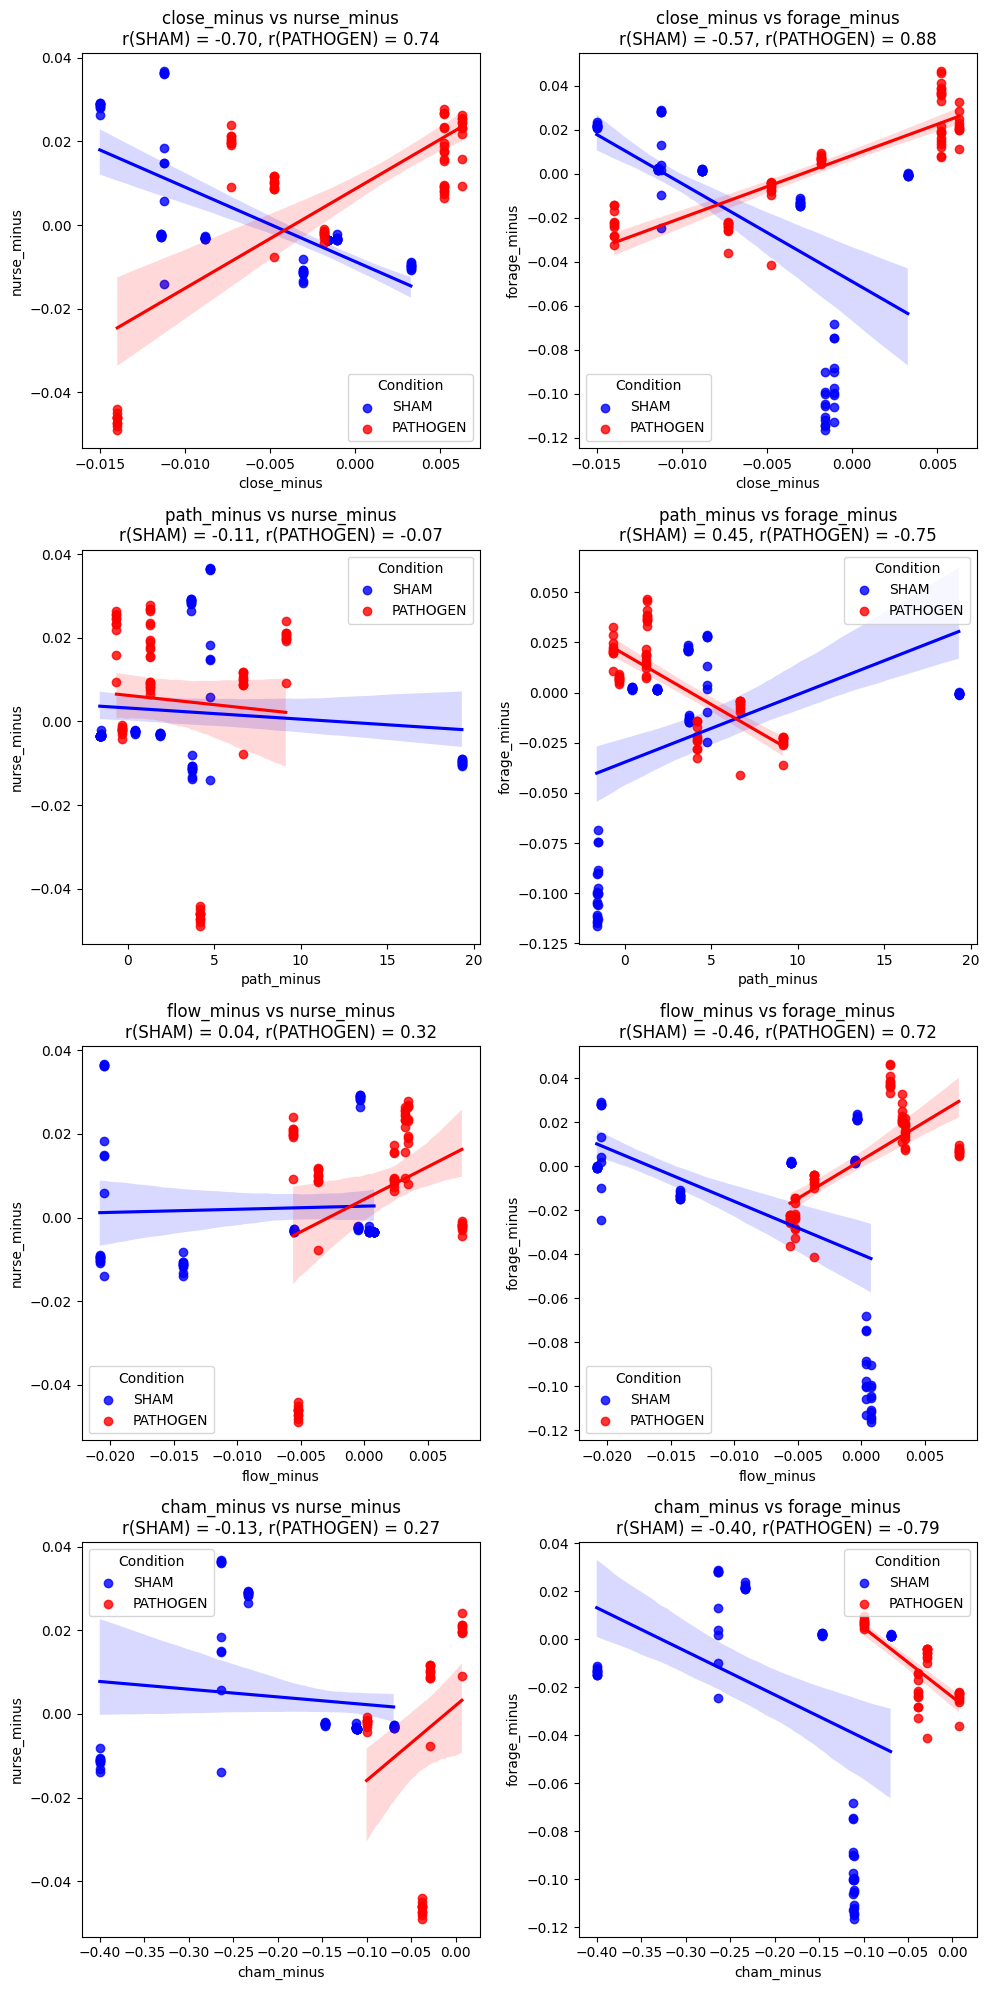

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Assuming result_df is your DataFrame and other necessary imports have been made
# ...

# List of columns to plot
columns_to_plot = ['close_minus', 'path_minus', 'flow_minus', 'cham_minus']

# Create a 4x2 plotting grid
fig, axs = plt.subplots(4, 2, figsize=(10, 20))

for i, column in enumerate(columns_to_plot):
    # Drop rows with NaN values in the current column, nurse_minus, forage_minus, and condition
    cleaned_df = data_to_plot[['nurse_minus', 'forage_minus', column, 'condition']].dropna()
    
    # Split data by condition
    sham_df = cleaned_df[cleaned_df['condition'] == 'SHAM']
    pathogen_df = cleaned_df[cleaned_df['condition'] == 'PATHOGEN']
    
    # Plot correlation with nurse_minus
    sns.regplot(data=sham_df, x=column, y='nurse_minus', color='blue', ax=axs[i, 0], label='SHAM')
    sns.regplot(data=pathogen_df, x=column, y='nurse_minus', color='red', ax=axs[i, 0], label='PATHOGEN')
    axs[i, 0].legend(title='Condition')
    r_nurse_sham = pearsonr(sham_df['nurse_minus'], sham_df[column])[0]
    r_nurse_pathogen = pearsonr(pathogen_df['nurse_minus'], pathogen_df[column])[0]
    axs[i, 0].set_title(f'{column} vs nurse_minus\nr(SHAM) = {r_nurse_sham:.2f}, r(PATHOGEN) = {r_nurse_pathogen:.2f}')
    
    # Plot correlation with forage_minus
    sns.regplot(data=sham_df, x=column, y='forage_minus', color='blue', ax=axs[i, 1], label='SHAM')
    sns.regplot(data=pathogen_df, x=column, y='forage_minus', color='red', ax=axs[i, 1], label='PATHOGEN')
    axs[i, 1].legend(title='Condition')
    r_forage_sham = pearsonr(sham_df['forage_minus'], sham_df[column])[0]
    r_forage_pathogen = pearsonr(pathogen_df['forage_minus'], pathogen_df[column])[0]
    axs[i, 1].set_title(f'{column} vs forage_minus\nr(SHAM) = {r_forage_sham:.2f}, r(PATHOGEN) = {r_forage_pathogen:.2f}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
